<a id='top'></a>

# Homework 5: Bootstrap, Hypothesis Testing and Regression
***

**Name**: __Parikshit Bhetwal__ 

***

This assignment is due on Moodle by **5 PM on Friday April 19**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [15 points] Problem 1 - Hypothesis Testing Whether your Co-worker is a Doofus 

You are working as a Data Scientist for an internet-based hedgehog deliver company. Your co-worker, Daley Jennanigans, is a lovable scamp! Unfortunately, Daley also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's hedgehog-loving customers. In each case, clearly explain why Daley's hypothesis testing setup or conclusion is incorrect.

**Part A**: Daley has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought a hedgehog. Let $X$ be the random variable describing the number of website visitors who bought a hedgehog in the previous month, and suppose that the population proportion of visitors who bought a hedgehog is $p$. Daley is interested to see if the data suggests that more than 20% of website visitors actually buy a hedgehog.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$. 

The hypothesis testing setup is incorrect here because $\hat{p}$ is not what we should use. Rather, we should use the population proportion of $p$ which would instead be $H_0: p = 0.20$.

**Part B**: Daley decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.20$.  

The hypothesis testing setup is incorrect here because the null hypothesis should always be equal to a value, not greater or less than a value. So we instead want $H_0: p = 0.20$. 

**Part C**: Now Daley is finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$. Daley computes for the sample proportion a normalized test-statistic of $z = 2.4$ and states that since $z = 2.4 > 0.01$ there is insufficient statistical evidence at the $\alpha = 0.01$ significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

The conclusion is incorrect because Daley should not compare the test-statistic to $\alpha$ but rather the p-value to $\alpha$.

**Part D**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$, and found the test-statistic $z=2.4$. Daley computes his p-value as:
$$\text{p-value} = \texttt{stats.norm.cdf(2.4)} = 0.9918$$

Since his p-value (0.9918) is greater than the significance level (0.01), Daley again claims that there is insufficient evidence at the 1% significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

The conclusion is incorrect because this is a right-tailed test and thus Daley is finding his p-value incorrectly. If we calculate the actual p-value, we get that his p-value (0.00819) is less than the significance level (0.01) and thus we have sufficient evidence at the 1% significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

In [2]:
p_value = 1-stats.norm.cdf(2.4)
print("p-value = 1-stats.norm.cdf(2.4) =",p_value)

p-value = 1-stats.norm.cdf(2.4) = 0.008197535924596155


**Part E**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. Suppose he computes a p-value of $0.03$, and then concludes that there is only a 3% probability that the null hypothesis is true. 

The conclusion is incorrect because the p-value is the probability that we see this data given that the null is true and thus it does _not_ mean that there is only a 3% probability that the null hypothesis is true. Also, he has calculated the p-value incorrectly. 

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [25 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be approximately normally distributed. The mean reaction times (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Set up your calculations by hand, and report the results in Markdown/MathJax. Of course, you can and should use Python as a calculator.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

$\large CI = \bar x \pm t \cdot \frac{\sigma}{\sqrt{n}}$
<br><br>
$\large t = 1.959963984540054$
<br><br>
$\large \text{Coffee+Nap }CI = 451.3 \pm t \cdot \frac{31.9}{\sqrt{10}}$
<br><br>
$\large = [428.48011470011295, 474.1198852998871]$
<br><br>
$\large \text{Coffee }CI = 494.2 \pm t \cdot \frac{39.6}{\sqrt{10}}$
<br><br>
$\large = [465.8718665242781, 522.5281334757218] $
<br><br>
$\large \text{Nap }CI = 492.8 \pm t \cdot \frac{45.2}{\sqrt{10}}$
<br><br>
$\large = [460.46586785094377, 525.1341321490563] $

### 1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
We __cannot__ make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times because the CI's are overlapping. 

### 2. Why did we use a t-distribution?
We used a t-distribution because n (10) is small since it is less than 30 and thus we must use a t-distribution when n is less than 30. 

In [3]:
alpha = 1 - (0.95)
T = stats.t.ppf(1-alpha/2, 9)
print("T:", T,"\n")

CoffeeAndNapUpper = 451.3 + T * 31.9/np.sqrt(10)
CoffeeAndNapLower = 451.3 - T * 31.9/np.sqrt(10)
print('Cofee + Nap CI = [' + str(CoffeeAndNapLower) + ', ' + str(CoffeeAndNapUpper) + ']', "\n")

CoffeeUpper = 494.2 + T * 39.6/np.sqrt(10)
CoffeeLower = 494.2 - T * 39.6/np.sqrt(10)
print('Cofee CI = [' + str(CoffeeLower) + ', ' + str(CoffeeUpper) + ']', "\n")

NapUpper = 492.8 + T * 45.2/np.sqrt(10)
NapLower = 492.8 - T * 45.2/np.sqrt(10)
print('Nap CI = [' + str(NapLower) + ', ' + str(NapUpper) + ']', "\n")

T: 2.2621571627409915 

Cofee + Nap CI = [428.48011470011295, 474.1198852998871] 

Cofee CI = [465.8718665242781, 522.5281334757218] 

Nap CI = [460.46586785094377, 525.1341321490563] 



**Part B**: Use a **rejection region hypothesis test** to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Note** that the number of degrees of freedom for a two-sample t-test is $df_1 + df_2 = (n_1-1) + (n_2-1) = n_1 + n_2 - 2$ (where $n_1$ and $n_2$ are the number of data points from each of the two samples). All other mechanics are the same as the two-sample z-tests we know and love.

If $\large t_{crit} > t_s$ reject the $H_0$
<br><br>
If $\large t_{crit} < t_s$  we fail to reject the $H_0$
<br><br>
$\large H_0: \text{Nap Reaction Time} - \text{Coffee Reaction Time} = 0$
<br><br>
$\large H_1: \text{Nap Reaction Time} - \text{Coffee Reaction Time} > 0$
<br><br>
$\large c = 0$
<br><br>
$\large t_s = \frac{(\bar x_1 - \bar x_2) - c}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}} = \frac{(\bar x_1 - \bar x_2)}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}}$
<br><br>
$\large t_s = \frac{(492.8 - 494.2)}{\sqrt{\frac{{45.2}^2}{10} + \frac{{39.6}^2}{10}}}$
<br><br>
$\large t_s = -0.07367196689546883$
<br><br>
$\large \text{degrees of freedom} = 18$
<br><br>
$\large t_{crit} = -1.734063606617536$
<br><br>
$\large t_{crit} < t_s$ 
<br>
So we fail to reject the null hypothesis using a rejection region hypothesis test.
<br><br>
As a sanity check:
<br><br>
$\large \text{p-value} = 0.47104196659710473$ 
<br><br>
$\large \text{p-value} > 0.05$
<br>
So we fail to reject the null hypothesis.

In [4]:
meanDiff = 492.8 - 494.2
SE = np.sqrt(45.2**2/10 + 39.6**2/10)

T = (meanDiff)/SE
print("T =",T)

print('p-value:', stats.t.cdf(T, 18))


T_crit = stats.t.ppf(0.05, 18)
print("T-crit:",T_crit)

T = -0.07367196689546883
p-value: 0.47104196659710473
T-crit: -1.734063606617536


**Part C**: Perform an appropriate hypothesis test (you may use either p-values or rejection region) to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap. So, there should be two separate hypothesis tests, but they are seeking to show similar results (one for coffee-nap versus coffee-only, and one for coffee-nap versus nap-only). Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

If $\large t_{crit} > t_s$ reject the $H_0$
<br><br>
If $\large t_{crit} < t_s$  we fail to reject the $H_0$

### First Test

$\large H_0: \text{Coffee-Nap} - \text{Coffee} = 0$
<br><br>
$\large H_1: \text{Coffee-Nap} - \text{Coffee} > 0$
<br><br>
$\large c = 0$
<br><br>
$\large t_s = \frac{(\bar x_1 - \bar x_2) - c}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}} = \frac{(\bar x_1 - \bar x_2)}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}}$
<br><br>
$\large t_s = \frac{(451.3 - 494.2)}{\sqrt{\frac{{31.9}^2}{10} + \frac{{39.6}^2}{10}}}$
<br><br>
$\large t_s = -2.6678557635847664$
<br><br>
$\large \text{degrees of freedom} = 18$
<br><br>
$\large t_{crit} = -1.734063606617536$
<br><br>
$\large t_{crit} > t_s$ 
<br>
So we reject the null hypothesis using a rejection region hypothesis test.

### Second Test

$\large H_0: \text{Coffee-Nap} - \text{Nap} = 0$
<br><br>
$\large H_1: \text{Coffee-Nap} - \text{Nap} > 0$
<br><br>
$\large c = 0$
<br><br>
$\large t_s = \frac{(\bar x_1 - \bar x_2) - c}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}} = \frac{(\bar x_1 - \bar x_2)}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}}$
<br><br>
$\large t_s = \frac{(451.3 - 492.8)}{\sqrt{\frac{{31.9}^2}{10} + \frac{{45.2}^2}{10}}}$
<br><br>
$\large t_s = -2.37214516432695$
<br><br>
$\large \text{degrees of freedom} = 18$
<br><br>
$\large t_{crit} = -1.734063606617536$
<br><br>
$\large t_{crit} > t_s$ 
<br>
So we reject the null hypothesis using a rejection region hypothesis test.

In [5]:
meanDiffCoffee = 451.3 - 494.2
SECoffee = np.sqrt(31.9**2/10 + 39.6**2/10)

T_sCoffee = (meanDiffCoffee)/SECoffee
print("T_s Coffee-Nap and Coffee =", T_sCoffee)

T_critCoffee = stats.t.ppf(0.05, 18)
print("T-crit Coffee-Nap and Coffee:", T_critCoffee, "\n")

meanDiffNap = 451.3 - 492.8
SENap = np.sqrt(31.9**2/10 + 45.2**2/10)

T_sNap = meanDiffNap/SENap
print("T_s Coffee-Nap and Nap =", T_sNap)

T_critNap = stats.t.ppf(0.05, 18)
print("T-crit Coffee-Nap and Nap:", T_critNap)

T_s Coffee-Nap and Coffee = -2.6678557635847664
T-crit Coffee-Nap and Coffee: -1.734063606617536 

T_s Coffee-Nap and Nap = -2.37214516432695
T-crit Coffee-Nap and Nap: -1.734063606617536


**Part D:** Is there sufficient evidence at the 95% confidence (5% significance) level to support claim that the reaction time after a coffee-nap is at least 20 ms faster than the reaction time after a coffee only? Fully justify your answer and show all work demonstrating this conclusion using a **p-value hypothesis test**. 

$\large t_s = \frac{(\bar x_1 - \bar x_2) - c}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}} = \frac{(\bar x_1 - \bar x_2)}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}}$
<br><br>
$\large t_s = \frac{(494.2-451.3-20)}{\sqrt{\frac{{39.6}^2}{10} + \frac{{31.9}^2}{10}}}$
<br><br>
$\large t_s = 1.424100162845947$
<br><br>
$\large p-value = 0.08576155679560282$
<br><br>
$\large p-value > 0.05$  
So we reject the null hypothesis and thus there is sufficient evidence at the 95% confidence (5% significance) level to support the claim that the reaction time after a coffee-nap is at least 20 ms faster than the reaction time after a coffee only.

In [6]:
meanDiffCoffee20 = 494.2 - 451.3 - 20
SECoffee20 = np.sqrt(39.6**2/10+31.9**2/10)

T_sCoffee20 = (meanDiffCoffee20)/SECoffee20
print("T_s Coffee-Nap and Coffee =", T_sCoffee20)
print('p-value:', 1-stats.t.cdf(T_sCoffee20, 18))

T_s Coffee-Nap and Coffee = 1.424100162845947
p-value: 0.08576155679560282


**Part E**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

$\large CI = [\sqrt{\frac{(n-1)s^2}{X^2_{1-\frac{\alpha}{2}}}}, \sqrt{\frac{(n-1)s^2}{X^2_{\frac{\alpha}{2}}}}]$
<br><br>
$\large n = 10$
<br><br>
$\large s = 31.9$
<br><br>
My 95% confidence interval for the standard deviation of reaction time for coffee-nap takers is $[21.94194309529309, 58.236964822374404].$

In [7]:
n = 10
var = 31.9**2
alpha = 1 - (0.95)
upCoffeeNapLim = np.sqrt(((n-1)*var)/stats.chi2.ppf((alpha/2), (n-1)))
lowCoffeeNapLim = np.sqrt(((n-1)*var)/stats.chi2.ppf(1 - (alpha/2), (n-1)))
print('CI = [' + str(lowCoffeeNapLim) + ', ' + str(upCoffeeNapLim) + ']')

CI = [21.94194309529309, 58.236964822374404]


<br>

---
[Back to top](#top)
<a id='p3'></a>

### [40 points] Problem 3 - Simple Linear Regression for Science!

From [Google Trends](https://trends.google.com/trends/?geo=US) data, it appears that interest in "science" in the United States has been waning since about 2004. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `science_interest.csv` into a Pandas DataFrame. Create two new columns:
* `year` should be the year associated with that data point, and
* `month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "science" has evolved over time. Label only the data point associated with January of each even year, and label with the year (and of course be sure to label your axes).

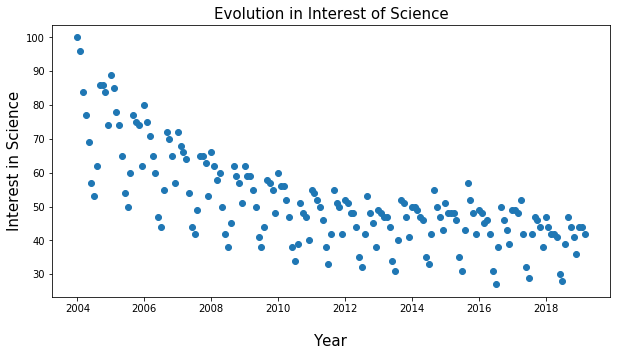

In [8]:
df = pd.read_csv("science_interest.csv", header = 1)

years =[]
months = []

for i in range(len(df)):
    years.append(int(df['Month'][i][:4]))
    months.append(int(df['Month'][i][-2:]))
    
df['year'] = years
df['month'] = months
df.rename(columns={'science: (United States)': 'science_interest'}, inplace=True)

fig, ax = plt.subplots(figsize=(10,5))

sample = df.index[(df['month'] == 1) & (df['year'] % 2 == 0)]

plt.scatter(df['Month'], df['science_interest'])
ax.set_xticks(sample)
ax.set_xticklabels(df.loc[sample, 'year'])

ax.set_xlabel("Year", fontsize = 15, labelpad = 20)
ax.set_ylabel("Interest in Science", fontsize = 15)
ax.set_title("Evolution in Interest of Science", fontsize = 15)

plt.show()

**Part B:** These data (and the sea-level data from Homework 4) are a **time series**, where the independent variable is *time* and the dependent quantity is interest in science. One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in science, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of even years, and be sure to label your axes.

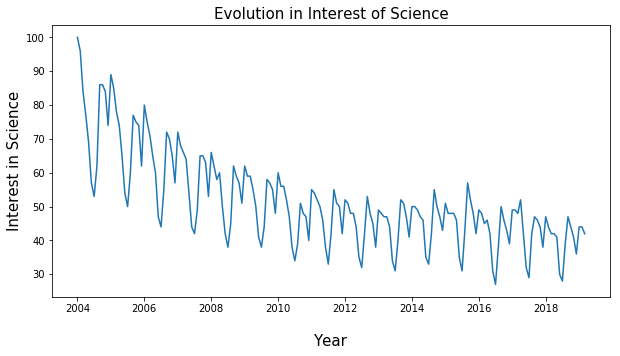

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(df['Month'], df['science_interest'])
ax.set_xticks(sample)
ax.set_xticklabels(df.loc[sample, 'year'])

ax.set_xlabel("Year", fontsize = 15, labelpad = 20)
ax.set_ylabel("Interest in Science", fontsize = 15)
ax.set_title("Evolution in Interest of Science", fontsize = 15)
plt.show()

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in science? During which months is interest in science highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in science for each month. So, compute 12 values and report them in a table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists, dammit.

What do you think accounts for the drop(s) in interest in science during those month(s)? Recall that these data are from the United States.

### Does your plot from Part B suggest that there is some annual cycle to the interest in science? During which months is interest in science highest? What about lowest?
My plot from Part B does suggest that there is some annual cycle to the interest in science. It seems to be highest at the beginning of each year and lowest towards the middle of the year, which is a annual cycle. There seems to also be two drops during each year in interest.  

### Justify your answers using your plot
From my plot alone, I would say that the highest interest is in January since it is the beginning of the year and the lowest interest is in June because it is the middle of the year. 

### Justify your answers by computing the mean interest in science for each month.
By computing the mean interest in science for each month, we find that the highest interest is in January and the lowest interest is in July. 

### What do you think accounts for the drop(s) in interest in science during those month(s)
I think that we can account for these drops in interest in science interest due to the breaks that we have in school in the United States. The first drop I believe is the summer break and the second break is the winter break. 

In [10]:
months = df['month'].unique()

mean_interest = []
for month in months:
    mean_interest.append(df.loc[df['month'] == month, 'science_interest'].mean())
    
table = pd.DataFrame(data = mean_interest, columns = ['Mean Science Interest'], 
                     index = ['January', 'February', 'March', 'April', 'May', 'June', 'July'
                             ,'August', 'September', 'October', 'November', 'December'])
print(table)

           Mean Science Interest
January                60.937500
February               58.562500
March                  55.812500
April                  55.133333
May                    49.733333
June                   39.533333
July                   36.200000
August                 45.466667
September              59.133333
October                56.533333
November               54.000000
December               46.933333


**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in science. Create a new Pandas DataFrame that consists only of two columns:
* `year`, and
* `interest`, the mean interest in science from the twelve months in that year.

In [11]:
years = df['year'].unique()

interest = []
for year in years:
    interest.append(df.loc[(df['year'] == year),'science_interest'].mean())

newDF = pd.DataFrame({'year': years, 'interest': interest})

newDF

,year,interest
0,2004,77.333333
1,2005,70.250000
2,2006,63.416667
3,2007,58.750000
4,2008,54.166667
5,2009,52.166667
6,2010,47.333333
7,2011,47.333333
8,2012,44.666667
9,2013,44.250000


**Part E:** Perform a simple linear regression with `year` as the feature and `interest` as the response (mean annual interest in science).  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

Then make a scatter plot of the mean annual interest in science as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

Estimated regression model: Y = 4131.6601715686265 + -2.0285539215686272x


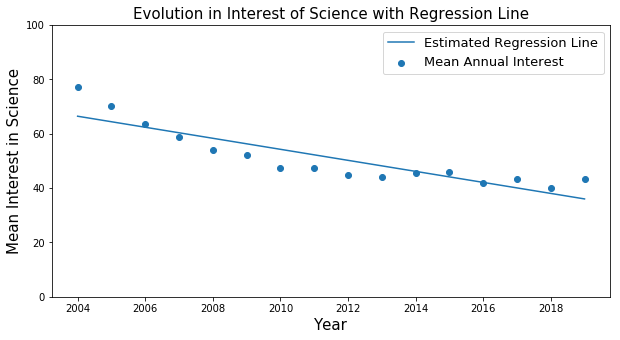

In [12]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x = newDF['year'], y = newDF['interest'])
print('Estimated regression model: Y = ' + str(intercept) + ' + ' + str(slope) + 'x')

fig, ax = plt.subplots(figsize=(10,5))

plt.scatter(years, interest, label = "Mean Annual Interest")
plt.plot(years, intercept + slope * years, label = "Estimated Regression Line")

plt.ylim(top = 100, bottom = 0)

plt.legend(fontsize = 13)
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Mean Interest in Science", fontsize = 15)
ax.set_title("Evolution in Interest of Science with Regression Line", fontsize = 15)

plt.show()

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in science is positive or negative. Fully justify your responses.

The coefficient $\hat{\beta}$ is the slope and thus is interpretated as the change in rate of the interest in science every year. The relationship between time and interest in science is negative. We can see this because the linear regression goes downward, not upward. From the python code below, we can also see that it is negative. 

In [13]:
print("Slope:", slope)

Slope: -2.0285539215686272


**Part G**: What interest in science does your simple linear regression model predict in the year 2030? What about in 2050? What are potential drawbacks to this model for interest in science?

In [14]:
prediction2030 = intercept + slope * 2030
prediction2050 = intercept + slope * 2050
print("Simple linear regression model prediction for the year 2030:", prediction2030)
print("Simple linear regression model prediction for the year 2050:", prediction2050)

Simple linear regression model prediction for the year 2030: 13.695710784313633
Simple linear regression model prediction for the year 2050: -26.875367647059647


### What are potential drawbacks to this model for interest in science?

The potential drawback to this model for interest in science is that it predicts that interest in science will become negative, which does not make sense. Interest is science should either be 0 or positive and not negative. 

**Part H:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result. Why is this a confidence interval for $\beta$ and not for $\hat{\beta}$?

### Why is this a confidence interval for  𝛽  and not for  𝛽̂

We do this for $\beta$ and not for $\hat{\beta}$ hat because $\hat{\beta}$ has no uncertaintity, we cannot do a CI for it. 
<br><br>
$\large CI = \hat{\beta} \pm t_{\frac{\alpha}{2},\ n-2} \cdot SE(\hat \beta)$
<br><br>
$\large n = 16$
<br><br>
$\large \hat \beta = \frac{\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2} = -2.0285539215686272$
<br><br>
$\large t_{\frac{\alpha}{2},\ n-2} = 0.9878340476382013$
<br><br>
$\large SSE = \sum_i^n (y_i -(\alpha + \beta \cdot x_i))^2 = 379.49666053921896$
<br><br>
$\large \hat \sigma = \sqrt{\frac{SSE}{n-2}} = 5.20642913369902$
<br><br>
$\large SE(\hat \beta) = \frac{\hat \sigma}{\sqrt{\sum_i^n (x_i - \bar x)^2}} = \frac{5.20642913369902}{18.439088914585774} = 0.28235826389342944$
<br><br>
$\large \text{Upper Limit} = -2.0285539215686272 + 0.9878340476382013 \cdot 0.28235826389342944$
<br><br>
$\large = -1.7496308148626856$
<br><br>
$\large \text{Lower Limit} = -2.0285539215686272 - 0.9878340476382013 \cdot 0.28235826389342944$
<br><br>
$\large = -2.307477028274569$
<br><br>
$\large CI = [-2.307477028274569, \ -1.7496308148626856]$
<br><br>
My 66% confidence interval for the slope parameter, $\beta$ is $[-2.307477028274569, \ -1.7496308148626856]$.

In [15]:
n = len(newDF['interest'])
print("n:", n)
x_bar = newDF['year'].mean()
y_bar = newDF['interest'].mean()

numerator = 0
denominator = 0
y_i = newDF['interest']
x_i = newDF['year']
for i in range(n): 
        numerator += (x_i[i] - x_bar) * (y_i[i] - y_bar)
        denominator += (x_i[i] - x_bar)**2
beta = numerator/denominator
    
print("My calculated beta:", beta)
print("Beta from stats.linregress for comparison:", slope)

alphaInter = y_bar - (beta*x_bar)
print("My calculated alpha:", alphaInter)
print("Beta from stats.linregress for comparison:", intercept)

alpha = 1 - (0.66)
t = stats.t.ppf(1-alpha/2, n-2)
print("t:", t)

SSE = 0 
y = alphaInter + beta * years
SE_denom = 0

for i in range(n):
    SSE += (y_i[i] - y[i])**2
    SE_denom += (years[i] - x_bar)**2
SE_denom = np.sqrt(SE_denom)

print("SSE:", SSE)

sigma_hat = np.sqrt(SSE/(n-2))
print("Sigma hat:", sigma_hat)

print("SE denominator:", SE_denom)
SE = sigma_hat/SE_denom
print("My calculated SE:", SE)
print("SE from stats.linregress for comparison:", stderr, "\n")

slopeCIUpperLim = beta + t * SE
slopeCILowerLim = beta - t * SE

print('CI = [' + str(slopeCILowerLim) + ', ' + str(slopeCIUpperLim) + ']')

n: 16
My calculated beta: -2.0285539215686272
Beta from stats.linregress for comparison: -2.0285539215686272
My calculated alpha: 4131.6601715686265
Beta from stats.linregress for comparison: 4131.6601715686265
t: 0.9878340476382013
SSE: 379.49666053921896
Sigma hat: 5.20642913369902
SE denominator: 18.439088914585774
My calculated SE: 0.28235826389342944
SE from stats.linregress for comparison: 0.2823582638934282 

CI = [-2.307477028274569, -1.7496308148626856]


**Part I:** What proportion of the variation in mean annual interest in science is explained by your linear regression model?

## The proportion of the variation in mean annual interest in science that is explained by my linear regression model is 0.7866326755553371. 

In [16]:
rvaluesquare = rvalue**2
print(rvaluesquare)

0.7866326755553371


**Part J:** Make a scatter plot of the residuals from this simple linear regression model, relative to the annual mean interest data (and be sure to label your axes). Make a conjecture about what kind of additional feature, also based on `year`, should be added to improve the fit of the model. Note that this new model with have your new feature _and_ `year`, making it a _multiple linear regression_ model.

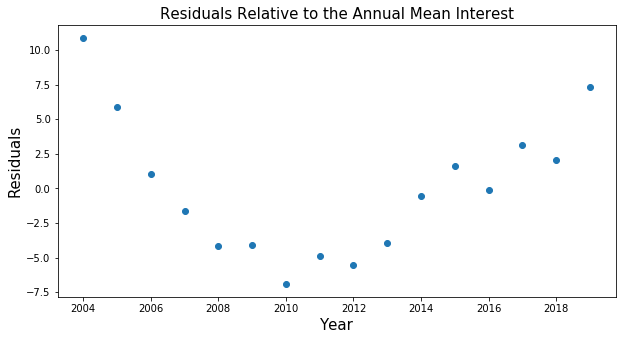

In [17]:
r = newDF['interest'] - (intercept + slope * newDF['year']) 

fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(newDF['year'], r)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Residuals", fontsize = 15)
plt.title("Residuals Relative to the Annual Mean Interest", fontsize = 15)
plt.show()

## Make a conjecture about what kind of additional feature, also based on year, should be added to improve the fit of the model.
The plot appears to be quadratic and adding an $x^2$ feature ($\text{year}^2$) should improve the fit of the model. 

In [18]:
import statsmodels.api as sm 

newestDF = newDF.copy()
newestDF['year_squared'] = newDF['year']**2

X = newestDF[['year', 'year_squared']]
X = sm.add_constant(X)

y = newestDF['interest']

model = sm.OLS(y,X).fit()
print("R-squared after adding years squared feature (MLR):", model.rsquared)

R-squared after adding years squared feature (MLR): 0.9690254121657699


## $R^2$ before adding an $x^2$ feature $(\text{year}^2)$ is 0.7866326755553371. 

## After adding an $x^2$ feature $(\text{year}^2)$, $R^2$ is 0.9690254121657699. Since $R^2$ is higher, the fit of the model is improved. 

<br>

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Choose-Your-Own Simple Linear Regression Adventure

The interest in science data from the previous problem was from [Google Trends](https://trends.google.com/trends/?geo=US). From that main page, you can enter a particular search term and view the interest in that term over time. By default, the data displayed will be weekly data for the past year. You can ask for different time periods or regions as well (my link above defaults to the United States).

**Part A:** Download data from Google Trends for a search term, region and time period of your choice. (Alternatively, you can also use data from whatever source you would like, as long as it is a time series.) Then:
* clearly state what your search term, region and time period are (or fully describe your other data set),
* load your data as a Pandas DataFrame, and
* make a plot of the data over the entire time frame. Be sure to label your axes clearly.

**NOTE:** be sure to **leave your plot cell executed** because you are not asked to host the data or provide the data set with the homework submission. If your plot is not readily visible when we open your notebook for grading, then you can earn a maximum of 10 points for this problem. 

## Clearly state what your search term, region and time period are as follows: 
- My search term was 'New York'.
- My region is the United States.
- My time period is 2004-2019. 

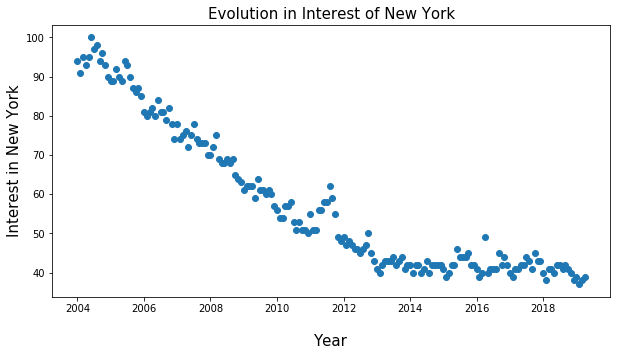

In [19]:
NYdf = pd.read_csv("NewYork_interest.csv", header = 1)
NYyears =[]
NYmonths = []
for i in range(len(NYdf)):
    NYyears.append(int(NYdf['Month'][i][:4]))
    NYmonths.append(int(NYdf['Month'][i][-2:]))
NYdf['year'] = NYyears
NYdf['month'] = NYmonths
NYdf.rename(columns={'New York: (United States)': 'NewYork_interest'}, inplace=True)

fig, ax = plt.subplots(figsize=(10,5))

sample = NYdf.index[(NYdf['month'] == 1) & (NYdf['year'] % 2 == 0)]

plt.scatter(NYdf['Month'], NYdf['NewYork_interest'])
ax.set_xticks(sample)
ax.set_xticklabels(NYdf.loc[sample, 'year'])

ax.set_xlabel("Year", fontsize = 15, labelpad = 20)
ax.set_ylabel("Interest in New York", fontsize = 15)
ax.set_title("Evolution in Interest of New York", fontsize = 15)

plt.show()

**Part B:** Based on your figure from Part A, formulate a hypothesis regarding whether or not a statistically significant linear trend exists. Clearly state your null and alternative hypotheses, and the level of significance you will use for this hypothesis test. If you have reason to believe some kind of a trend that is *not linear* exists, say so.

I will use:
<br><br>
$\large H_0: \hat \beta = 0$ 
<br><br>
$\large H_1: \hat \beta \neq 0$
<br><br>
$\large \alpha = 0.05$
<br><br>
I have ___no___ reason to believe some kind of a trend that is not linear exists. 

**Part C:** Perform any processing that you need to do in order to satisfy the assumptions of the simple linear regression model. If you do not do any processing, then explain why you believe your data set already satisfies these assumptions (and clearly state the assumptions).

One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, annual cycles are patterns that reoccur each year and are frequently present in time series data. I have made a line plot below to show that there are annual cycles. 
<br><br>
I have also assumed that the data is normally distributed. 

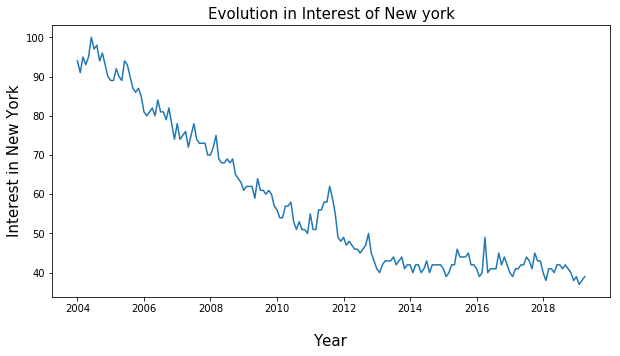

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(NYdf['Month'], NYdf['NewYork_interest'])
ax.set_xticks(sample)
ax.set_xticklabels(NYdf.loc[sample, 'year'])

ax.set_xlabel("Year", fontsize = 15, labelpad = 20)
ax.set_ylabel("Interest in New York", fontsize = 15)
ax.set_title("Evolution in Interest of New york", fontsize = 15)
plt.show()

## Need to process our data a bit further before fitting a regression model
## One way to address this is to take the mean of all the data each year 
NYyears = NYdf['year'].unique()

NYinterest = []
for NYyear in NYyears:
    NYinterest.append(NYdf.loc[(NYdf['year'] == NYyear),'NewYork_interest'].mean())

newNYDF = pd.DataFrame({'year': NYyears, 'interest': NYinterest})

**Part D:** Compute **by hand** the p-value associated with the hypothesis test from Part B. Clearly state your conclusion. You may use `scipy.stats.linregress` to check your answer, and you may use Python as a calculator (and to get critical values, for example), but you need to show all your work by hand.

$\large t_s = \frac{\hat \beta - c}{SE(\hat \beta)}$ 
<br><br>
$\large c = 0$
<br><br>
$\large \hat \beta = -3.6906862745098037$ 
<br><br>
$\large SSE = \sum_i^n (y_i -(\alpha + \beta \cdot x_i))^2 = 667.1927287581815$
<br><br>
$\large \hat \sigma = \sqrt{\frac{SSE}{n-2}} = 6.903377686518915$
<br><br>
$\large SE(\hat \beta) = \frac{\hat \sigma}{\sqrt{\sum_i^n (x_i - \bar x)^2}} = \frac{6.903377686518915}{18.439088914585774} = 0.374388220507911$
<br><br>
So: 
<br><br>
$\large t_s = \frac{-3.6906862745098037}{0.374388220507911} = -9.857912381705978$
<br><br>
$\large p-value = 0.00000011149832149183$
<br><br>
$\large p-value < 0.05$
<br>

## So we reject the null hypothesis which is that a statistically significant linear trend _does not_ exist. 

In [21]:
## For comparison 
NYslope, NYinter, NYrvalue, NYpvalue, NYstderr = stats.linregress(x = newNYDF['year'], y = newNYDF['interest'])

## Calculate slope(beta)
NYn = len(newNYDF['interest'])
print("n:", NYn)
NYx_bar = newNYDF['year'].mean()
NYy_bar = newNYDF['interest'].mean()

NYnumerator = 0
NYdenominator = 0
NYy_i = newNYDF['interest']
NYx_i = newNYDF['year']
for i in range(n): 
        NYnumerator += (NYx_i[i] - NYx_bar) * (NYy_i[i] - NYy_bar)
        NYdenominator += (NYx_i[i] - NYx_bar)**2
NYbeta = NYnumerator/NYdenominator
    
print("My calculated beta:", NYbeta)
print("Beta from stats.linregress for comparison:", NYslope)

## Calculate intercept(alpha)
NYalpha = NYy_bar - (NYbeta*NYx_bar)
print("My calculated alpha:", NYalpha)
print("Beta from stats.linregress for comparison:", NYinter)

## Calculate SSE
NYSSE = 0 
NY_y = NYalpha + NYbeta * NYx_i
NYSE_denom = 0

for i in range(NYn):
    NYSSE += (NYy_i[i] - NY_y[i])**2
    NYSE_denom += (NYx_i[i] - NYx_bar)**2
NYSE_denom = np.sqrt(NYSE_denom)

print("SSE:", NYSSE)

#Calculate sigma hat
NYsigma_hat = np.sqrt(NYSSE/(NYn-2))
print("Sigma hat:", NYsigma_hat)

#Calculate SE
print("SE denominator:", NYSE_denom)
NYSE = NYsigma_hat/NYSE_denom

print("My calculated SE:", NYSE)
print("SE from stats.linregress for comparison:",NYstderr)

## Calculate test statistic 
NY_ts = NYbeta/NYSE
print("Test statistic:", NY_ts, "\n")

##Calculate p-value 
NYp_value = 2*stats.t.cdf(NY_ts, n-2)
print ("My calculated p-value: {:.20f}".format(NYp_value))
print("P-value from scipy.stats.linregress for comparison: {:.20f}".format(NYpvalue))

n: 16
My calculated beta: -3.6906862745098037
Beta from stats.linregress for comparison: -3.6906862745098046
My calculated alpha: 7480.81544117647
Beta from stats.linregress for comparison: 7480.815441176472
SSE: 667.1927287581815
Sigma hat: 6.903377686518915
SE denominator: 18.439088914585774
My calculated SE: 0.374388220507911
SE from stats.linregress for comparison: 0.37438822050790743
Test statistic: -9.857912381705978 

My calculated p-value: 0.00000011149832149183
P-value from scipy.stats.linregress for comparison: 0.00000011149832149182
